In [3]:
import numpy as np
import csv
with open('Q83666vfvb.csv', newline='') as csvfile:
    rdr = csv.reader(csvfile)
    next(rdr)
    data = list(rdr)
   
idx = 0
vf = np.zeros(len(data))
vb = np.zeros(len(data))
for tup in data:
    vf[idx] = vf[idx-1] if tup[1] == "NaN" else tup[1]
    vb[idx] = vf[idx-1] if tup[2] == "NaN" else tup[2]
    idx = idx + 1
    

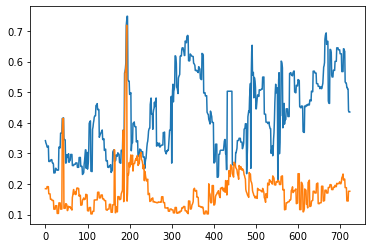

In [4]:
from matplotlib import pyplot as plt

plt.plot(vf)
plt.plot(vb)

In [5]:
from scipy import signal
import math

# $\displaystyle y(n) = x(n) - x(n-1) + R\, y(n-1)$

alpha = 0.9

vf_dc = np.zeros(len(vf))
vb_dc = np.zeros(len(vb))
vf_dc[0] = 0
vb_dc[0] = 0
for idx in np.arange(len(vf)-1) + 1:
    vf_dc[idx] = vf[idx] - vf[idx-1] + alpha*vf_dc[idx-1]
    vb_dc[idx] = vb[idx] - vb[idx-1] + alpha*vb_dc[idx-1]
    
    

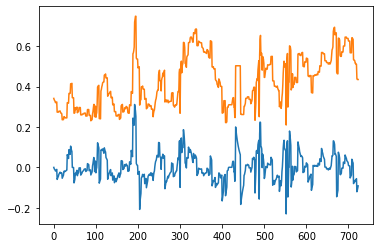

In [6]:
plt.plot(vf_dc)
plt.plot(vf)

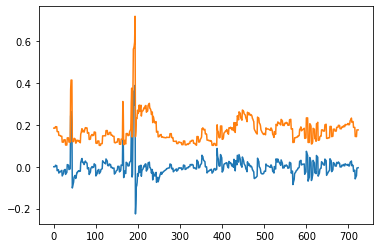

In [7]:
plt.plot(vb_dc)
plt.plot(vb)

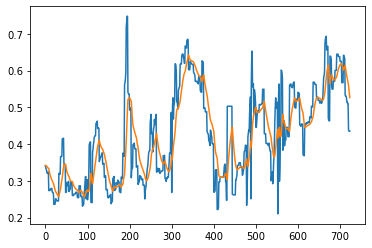

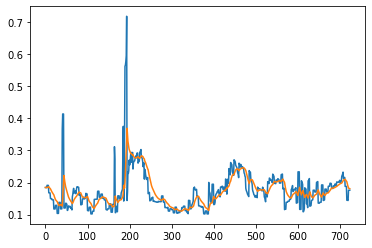

In [8]:
vf_corrected = vf - vf_dc
vb_corrected = vb - vb_dc

plt.figure(1)
plt.plot(vf)
plt.plot(vf_corrected)

plt.figure(2)
plt.plot(vb)
plt.plot(vb_corrected)


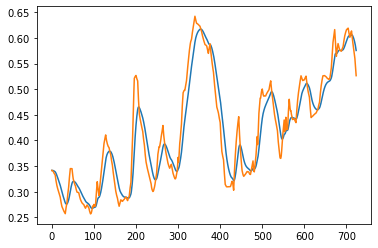

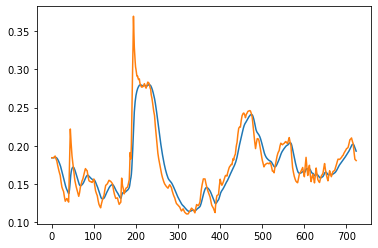

In [9]:
alpha = 0.9

vf_corrected_smooth = np.zeros(len(vf_corrected))
vb_corrected_smooth = np.zeros(len(vb_corrected))
vf_corrected_smooth[0] = vf_corrected[0]
vb_corrected_smooth[0] = vb_corrected[0]
for idx in np.arange(len(vf)-1) + 1:
    vf_corrected_smooth[idx] = alpha*vf_corrected_smooth[idx-1] + (1-alpha)*vf_corrected[idx]
    vb_corrected_smooth[idx] = alpha*vb_corrected_smooth[idx-1] + (1-alpha)*vb_corrected[idx]
    
plt.figure(1)
plt.plot(vf_corrected_smooth)
plt.plot(vf_corrected)

plt.figure(2)
plt.plot(vb_corrected_smooth)
plt.plot(vb_corrected)
